In [1]:
# 0. imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import itertools
import os
import statsmodels.api as sm
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,9)

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# 1. data load
macro_monthly_file = "./data/macro_monthly_data.csv"
df_mm = pd.read_csv(macro_monthly_file)
df_mm.head(3)

,unemployment,CPI_inflation,industrial_production_YoY,month
0,13.2,4.1,8.5,01/01/2012
1,13.4,4.3,4.6,01/02/2012
2,13.3,3.9,0.9,01/03/2012


In [3]:
# 2. make a plot for unemployment and inflation
df_mm.index = pd.PeriodIndex([pd.Period(el, freq="M") for el in pd.to_datetime(df_mm.loc[:, "month"], format="%d/%m/%Y")])
df_mm.loc[:, "month"] = [pd.to_datetime(el, format="%d/%m/%Y") for el in df_mm.loc[:, "month"]]
df_mm.head(3)

,unemployment,CPI_inflation,industrial_production_YoY,month
2012-01,13.2,4.1,8.5,2012-01-01
2012-02,13.4,4.3,4.6,2012-02-01
2012-03,13.3,3.9,0.9,2012-03-01


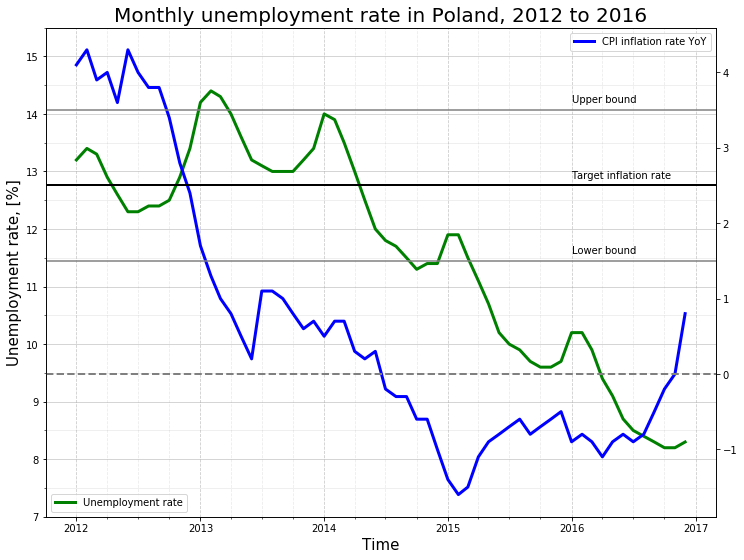

In [4]:
fig_unemp = plt.figure(1)
ax_unemp = fig_unemp.add_subplot(1,1,1)
# ax_joint.plot_date(x = df_mm.loc[:,"month"],
#                   y = df_mm.loc[:, ["unemployment", "CPI_inflation", "industrial_production_YoY"]],
#                   fmt="-")
ax_unemp.plot_date(x = df_mm.loc[:, "month"],
                  y = df_mm.loc[:, "unemployment"], fmt="-",
                  label="Unemployment rate", linewidth=3,
                  color="green")
# format y axis
ax_unemp.set_yticks(np.arange(7,16,1), minor=False)
ax_unemp.set_yticks(np.arange(7,16,0.5), minor=True)
ax_unemp.yaxis.grid(True, which="major", alpha=0.5)
ax_unemp.yaxis.grid(True, which="minor", alpha=0.25)

# format x axis
ax_unemp.xaxis.set_major_locator(locator=dt.YearLocator(1))
ax_unemp.xaxis.set_minor_locator(dt.MonthLocator(bymonth=(1,4,7,10)))
ax_unemp.xaxis.grid(True, which="minor", alpha=0.25, linestyle="--")
ax_unemp.xaxis.grid(True, which="major", alpha=0.5, linestyle="--")

# add titles for the plot and axes
ax_unemp.set_xlabel("Time", fontsize=15)
ax_unemp.set_ylabel("Unemployment rate, [%]", fontsize=15)
ax_unemp.set_title("Monthly unemployment rate in Poland, 2012 to 2016", fontsize=20)

ax_inflation_twin = ax_unemp.twinx()
ax_inflation_twin.plot_date(x = df_mm.loc[:, "month"], y = df_mm.loc[:, "CPI_inflation"],
                           color="blue", linewidth=3, fmt="-", label = "CPI inflation rate YoY")

# display legend
ax_unemp.legend(loc="lower left")
ax_inflation_twin.legend(loc="upper right")

# Overlay the National Bank of Poland inflation target 
ax_inflation_twin.axhline(2.5, color="black", linewidth=2)
ax_inflation_twin.axhline(3.5, color="grey", linewidth=1.5)
ax_inflation_twin.axhline(1.5, color="grey", linewidth=1.5)
ax_inflation_twin.text(x=pd.Timestamp("2016-01-01"), y=2.6, s="Target inflation rate")
ax_inflation_twin.text(x=pd.Timestamp("2016-01-01"), y=3.6, s="Upper bound")
ax_inflation_twin.text(x=pd.Timestamp("2016-01-01"), y=1.6, s="Lower bound")

ax_inflation_twin.axhline(0, color="grey", linewidth=2, linestyle="--")

In [5]:
# 3. do simple seasonal analysis on the unemployment rate time series
df_mm.head(4)
df_mm_sd = df_mm.loc[:, ["month", "unemployment"]]
df_mm_sd.loc[:, "month"] = pd.to_datetime(df_mm_sd.loc[:, "month"])
df_mm_sd_2 = df_mm_sd.set_index("month")
df_mm_sd_2.head(3)
res = sm.tsa.seasonal_decompose(df_mm_sd_2, model="additive", two_sided=False)

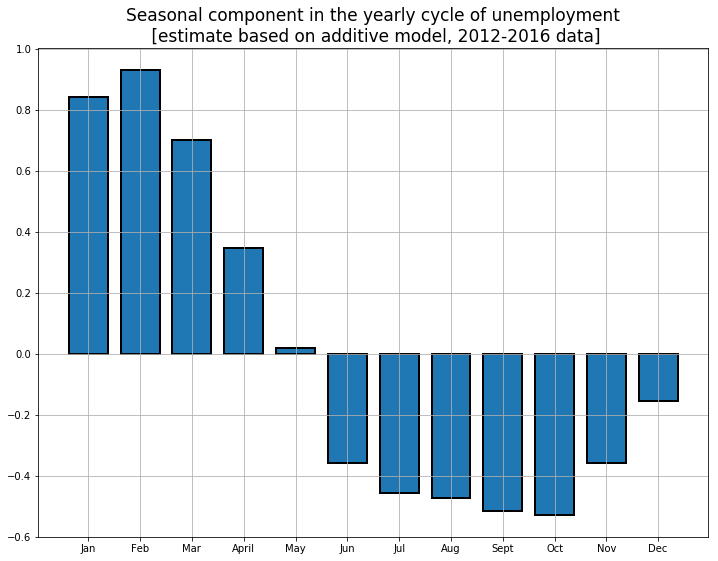

In [6]:
# plot seasonal component - vertical bar chart
fig_seasonal = plt.figure()
fig_seasonal_comp = plt.figure(2)
ax_bar = fig_seasonal_comp.add_subplot(1,1,1)
ax_bar.bar(left=np.arange(1, 13, 1), height=res.seasonal.iloc[0:12, 0], width=0.75, 
           edgecolor="black", linewidth=2)
ax_bar.set_title("Seasonal component in the yearly cycle of unemployment\n [estimate based on additive model, 2012-2016 data]",
                fontsize=17)
ax_bar.set_xticks(np.arange(1,13,1))
ax_bar.set_xticklabels(["Jan", "Feb", "Mar", "April", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"])
ax_bar.grid(True)

In [7]:
type(res.seasonal)

pandas.core.frame.DataFrame

In [8]:
res.seasonal.head(3)
res.seasonal.iloc[0:12, 0]

month
2012-01-01    0.841319
2012-02-01    0.930903
2012-03-01    0.699653
2012-04-01    0.346528
2012-05-01    0.019444
2012-06-01   -0.356597
2012-07-01   -0.454514
2012-08-01   -0.473264
2012-09-01   -0.513889
2012-10-01   -0.526389
2012-11-01   -0.357639
2012-12-01   -0.155556
Name: unemployment, dtype: float64

In [9]:
# 3. Let's do some simple inflation-unemployment analysis a'la Phillips curve

In [36]:
# 3.1. First, let's prepare a data frame
df_ui = df_mm.loc[:, ["CPI_inflation", "unemployment", "month"]]
df_ui.reset_index(inplace=True, drop=True)
df_ui.head(3)

,CPI_inflation,unemployment,month
0,4.1,13.2,2012-01-01
1,4.3,13.4,2012-02-01
2,3.9,13.3,2012-03-01


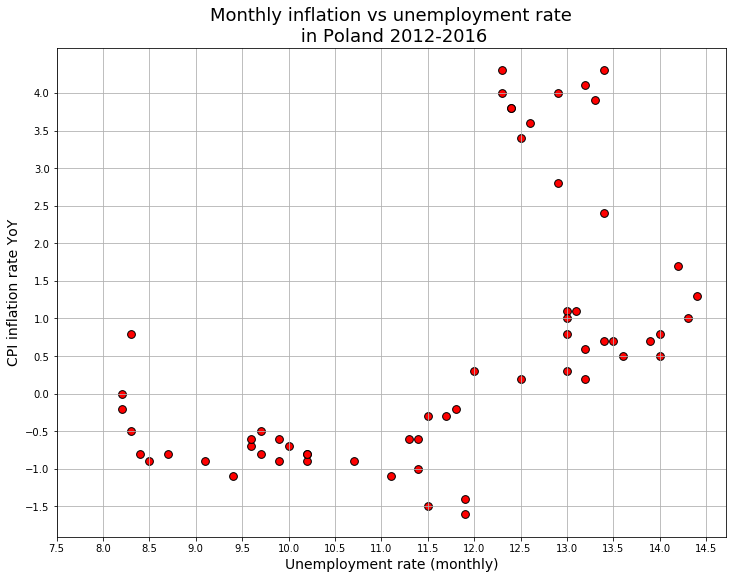

In [39]:
fig_ui = plt.figure(3)
ax_ui = fig_ui.add_subplot(1,1,1)
ax_ui.scatter(x=np.array(df_ui.loc[:, "unemployment"]),
            y=np.array(df_ui.loc[:, "CPI_inflation"]), 
              s=60, c="red", edgecolor="black")
ax_ui.set_xticks(np.arange(7.5, 15, 0.5))
ax_ui.set_yticks(np.arange(-1.5, 4.5, 0.5))
ax_ui.grid(True)
ax_ui.set_title("Monthly inflation vs unemployment rate\n in Poland 2012-2016", fontsize=18)
ax_ui.set_xlabel("Unemployment rate (monthly)", fontsize=14)
ax_ui.set_ylabel("CPI inflation rate YoY", fontsize=14)
# # setting minor grid on the plot
# minor_axis_grid = np.arange(7.5, 15, 1.5)
# ax_ui.xaxis.set_minor_locator(locator=minor_axis_grid)
# # setting minor grid on the plot
# minor_axis_grid = np.arange(7.5, 15, 0.5)
# ax_ui.xaxis.set_major_locator(locator=major_axis_grid)